In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('C:\\Nastaran\\Spring2019\\Python\\Titanic')

In [3]:
data = pd.read_csv('titanic.csv',index_col=0)

In [4]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
# There are missing values in Age, Cabin and Embarked columns

In [7]:
data.shape

(891, 11)

In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Removing Unnecessary columns:

Name and Ticket columns are not useful. 

In [9]:
data = data.drop(columns=['Name','Ticket'])

In [10]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

### Dealing with missing values

In [11]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
print('Number of NA values in Age column is ', str(data.Age.isna().sum()))
print('Number of NA values in Cabin column is ', str(data.Cabin.isna().sum()))
print('Number of NA values in Embarked column is ', str(data.Embarked.isna().sum()))

Number of NA values in Age column is  177
Number of NA values in Cabin column is  687
Number of NA values in Embarked column is  2


There are so many missing values in Cabin. So, I will drop the column.
There are only 2 instances with missing value for Embarked. So, I will fill them with most repeated category of the column.
There are only 177 instances with missing value for Age. So, I will fill them with mean value of the column.

In [13]:
data = data.drop(columns=['Cabin'])

In [14]:
# Embarked with categorical values
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### Filling the N/A values in Embarked column with most frequent one

In [15]:
data.Embarked=data.Embarked.fillna(value='S')

In [16]:
data.Age=data.Age.fillna(value=np.mean(data.Age))

In [17]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### There is no missing values in the dataset!

##### Female passengers vs Male passengers

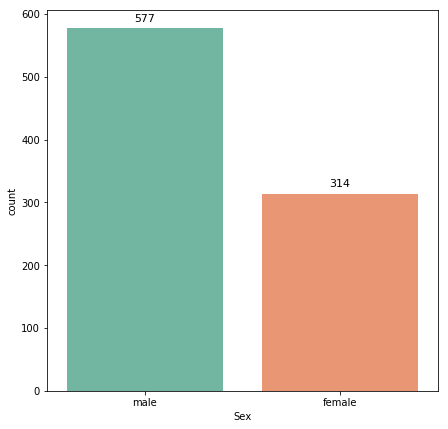

In [18]:
plt.figure(figsize=(7,7))
ax = sns.countplot(x=data.Sex,palette=sns.color_palette("Set2"))
# Adding respective values to the top of each bar
for p in ax.patches: 
    ax.annotate("%i" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10), 
                textcoords='offset points')

#### There are 577 male passengers vs 314 female passengers.

In [19]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Among 981 passengers, 342 of them are survived.

In [20]:
print('Percantage of survived passengers:',round(data.Survived.sum()/data.shape[0] * 100,2),'%.')

Percantage of survived passengers: 38.38 %.


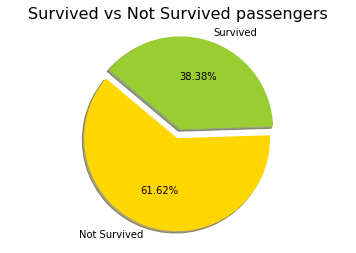

In [21]:
# Data to plot
labels = 'Not Survived' , 'Survived'

sizes = []
length = data.Survived.shape[0]
for i in data.Survived.value_counts().values:
    sizes.append(round((i/length*100),2))
    
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

#displaying the percent value with percentage sign, if we dont want the percentage sign can simply put autopct= '%.2f'
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%'.format(p=pct)
    return my_autopct


# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140, autopct = make_autopct(sizes))
plt.axis('equal')
plt.title('Survived vs Not Survived passengers',fontsize=16)
plt.show()

In [22]:
a = round(data[['Sex','Survived']].groupby(by='Sex').sum()['Survived']/data.shape[0] * 100 ,2)
a

Sex
female    26.15
male      12.23
Name: Survived, dtype: float64

### Among all survived passengers, 26.15% are femals and 12.23% are male!

In [23]:
print('Percentage of female survived passengers from all females:',str(round((data[['Sex','Survived']].groupby(by='Sex',as_index = False).sum()['Survived'][0]\
                                                  / \
       data[data['Sex'] == 'female'].shape[0]) * 100 , 2)),'%.')


print('Percentage of male survived passengers from all males:',str(round((data[['Sex','Survived']].groupby(by='Sex',as_index = False).sum()['Survived'][1]\
                                                / \
       data[data['Sex'] == 'male'].shape[0]) * 100 , 2)),'%.')

Percentage of female survived passengers from all females: 74.2 %.
Percentage of male survived passengers from all males: 18.89 %.


#### 74.2% female passengers are survived.
#### 18.89% male passengers are survived.

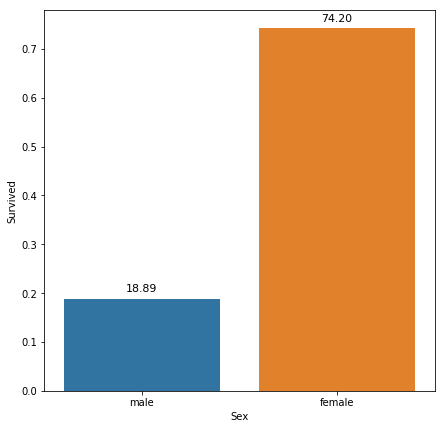

In [24]:
plt.figure(figsize=(7,7))
ax = sns.barplot(x="Sex", y="Survived",data=data,ci=None)
# Adding respective values to the top of each bar
for p in ax.patches: 
    ax.annotate("%.2f" % (p.get_height()*100), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10), 
                textcoords='offset points')

#### 74.2% female passengers are survived.
#### 18.89% male passengers are survived.

In [25]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

### There are only two continuous columns; Fare and Age.
### Is there any outlier in Fare and Age columns?

In [26]:
def outlier(column):
    Q1 = np.percentile(column,25)
    Q3 = np.percentile(column,75)
    IQR = Q3-Q1
    outliers = []

    
    for num in column:
        if num > (Q3 + 3/2 * IQR) or num < (Q1 - 3/2 * IQR):
            outliers.append(num)
    return outliers

In [27]:
Age = data.Age
Fare = data.Fare

In [28]:
AgeOutliers = outlier(Age)
FareOutliers = outlier(Fare)

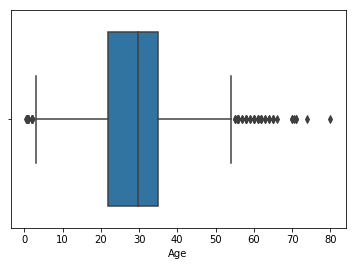

In [29]:
sns.boxplot(x= data.Age)

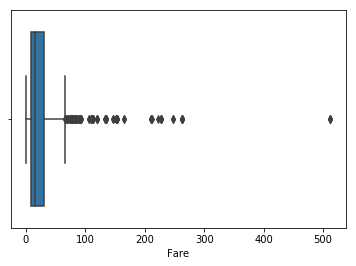

In [30]:
sns.boxplot(x= Fare)

#### Taking care of outliers with replacing them with upper or lower bound

In [31]:
Q1 = np.percentile(Age,25)
Q3 = np.percentile(Age,75)
innerQ = Q3-Q1
    
Age_upper_bound = Q3 + 3/2 * innerQ
Age_lower_bound = Q1 - 3/2 * innerQ

for i in range(1,len(data.Age)+1):
    if data.Age[i] in AgeOutliers:
        if data.Age[i] < Age_lower_bound:
            data.Age[i] = Age_lower_bound
        else:
            data.Age[i] = Age_upper_bound

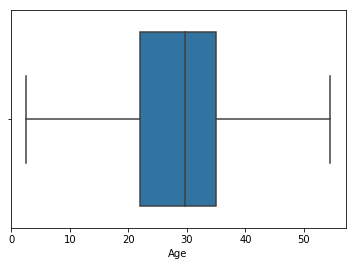

In [32]:
sns.boxplot(x= data.Age)

In [33]:
Q1 = np.percentile(Fare,25)
Q3 = np.percentile(Fare,75)
innerQ = Q3-Q1
    
Fare_upper_bound = Q3 + 3/2 * innerQ
Fare_lower_bound = Q1 - 3/2 * innerQ

for i in range(1,len(data.Fare)+1):
    if data.Fare[i] in FareOutliers:
        if data.Fare[i] < Fare_lower_bound:
            data.Fare[i] = Fare_lower_bound
        else:
            data.Fare[i] = Fare_upper_bound

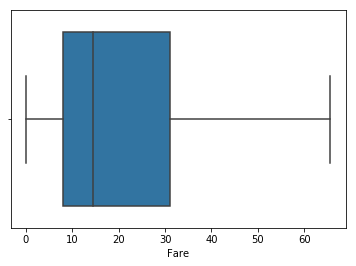

In [34]:
sns.boxplot(x= data.Fare)

In [35]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,65.6344,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


### Sex and Embarked are categorical.
### Converting categorical data to numerical data to use in the model:

In [36]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [37]:
label_encoder = LabelEncoder()

In [38]:
L = ['Sex','Embarked']

for item in L:
    data[item] = label_encoder.fit_transform(data[item])

In [39]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,65.6344,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2


In [40]:
#data.Embarked.value_counts()
one_hot_encoder = OneHotEncoder(categorical_features=[7])
data = one_hot_encoder.fit_transform(data).toarray()

In [41]:
#data = pd.DataFrame(data)

In [42]:
#data.Embarked = pd.get_dummies(data['Embarked'],prefix=['Embarked'])

In [43]:
data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,0.0,1.0,1.0,0.0,38.0,1.0,0.0,65.6344
2,0.0,0.0,1.0,1.0,3.0,0.0,26.0,0.0,0.0,7.9250
3,0.0,0.0,1.0,1.0,1.0,0.0,35.0,1.0,0.0,53.1000
4,0.0,0.0,1.0,0.0,3.0,1.0,35.0,0.0,0.0,8.0500


In [44]:
data = data.rename(columns={0:'Embarked_0',1:'Embarked_1',2:'Embarked_2',\
                            3:'Survived', 4:'Pclass', 5:'Sex', 6:'Age', \
                            7:'SibSp', 8:'Parch', 9:'Fare', 10:'Cabin'})

In [45]:
data.head()

,Embarked_0,Embarked_1,Embarked_2,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,0.0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,0.0,1.0,1.0,0.0,38.0,1.0,0.0,65.6344
2,0.0,0.0,1.0,1.0,3.0,0.0,26.0,0.0,0.0,7.9250
3,0.0,0.0,1.0,1.0,1.0,0.0,35.0,1.0,0.0,53.1000
4,0.0,0.0,1.0,0.0,3.0,1.0,35.0,0.0,0.0,8.0500


In [46]:
data = data[['Embarked_0','Embarked_1','Embarked_2','Fare','Pclass','Sex','Age','SibSp','Parch','Survived']]

In [47]:
data.head()

,Embarked_0,Embarked_1,Embarked_2,Fare,Pclass,Sex,Age,SibSp,Parch,Survived
0,0.0,0.0,1.0,7.2500,3.0,1.0,22.0,1.0,0.0,0.0
1,1.0,0.0,0.0,65.6344,1.0,0.0,38.0,1.0,0.0,1.0
2,0.0,0.0,1.0,7.9250,3.0,0.0,26.0,0.0,0.0,1.0
3,0.0,0.0,1.0,53.1000,1.0,0.0,35.0,1.0,0.0,1.0
4,0.0,0.0,1.0,8.0500,3.0,1.0,35.0,0.0,0.0,0.0


### independent variables and lable:

In [48]:
x = data.iloc[:,:9]
y = data.iloc[:,9]

In [49]:
print(x.iloc[0])
print(y.iloc[0])

Embarked_0     0.00
Embarked_1     0.00
Embarked_2     1.00
Fare           7.25
Pclass         3.00
Sex            1.00
Age           22.00
SibSp          1.00
Parch          0.00
Name: 0, dtype: float64
0.0


### Is the label balanced?

In [50]:
data.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

### Number of survived passengers and not survived passengers are not balanced! So, it is better to use
### other metrics for evaluation besides accuracy, such as precision, recall and f1-score!

## Creating predictive models with different algorithms to predict the survival of the passengers

### #1: Logostic Regression
#### To Make sure whether scaling the features improves the performance of the Logistic Regression mosel
#### or not, I will create two models, one with scaled data and one with not scaled data!

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(x)

In [53]:
x = pd.DataFrame(x)
x.head()

,Embarked_0,Embarked_1,Embarked_2,Fare,Pclass,Sex,Age,SibSp,Parch
0,0.0,0.0,1.0,7.2500,3.0,1.0,22.0,1.0,0.0
1,1.0,0.0,0.0,65.6344,1.0,0.0,38.0,1.0,0.0
2,0.0,0.0,1.0,7.9250,3.0,0.0,26.0,0.0,0.0
3,0.0,0.0,1.0,53.1000,1.0,0.0,35.0,1.0,0.0
4,0.0,0.0,1.0,8.0500,3.0,1.0,35.0,0.0,0.0


In [54]:
x.head()

,Embarked_0,Embarked_1,Embarked_2,Fare,Pclass,Sex,Age,SibSp,Parch
0,0.0,0.0,1.0,7.2500,3.0,1.0,22.0,1.0,0.0
1,1.0,0.0,0.0,65.6344,1.0,0.0,38.0,1.0,0.0
2,0.0,0.0,1.0,7.9250,3.0,0.0,26.0,0.0,0.0
3,0.0,0.0,1.0,53.1000,1.0,0.0,35.0,1.0,0.0
4,0.0,0.0,1.0,8.0500,3.0,1.0,35.0,0.0,0.0


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
classifier_LR = LogisticRegression(random_state = 0,penalty='l1')
Log_Reg_clf = classifier_LR.fit(x_scaled, y)

In [56]:
LR_scores = cross_val_score(Log_Reg_clf, x_scaled, y, cv=5, scoring='accuracy')
LR_scores  

array([0.78212291, 0.7877095 , 0.76966292, 0.76404494, 0.81355932])

In [57]:
Log_Reg_clf_not_scaled = classifier_LR.fit(x, y)
LR_scores_not_scaled = cross_val_score(Log_Reg_clf_not_scaled, x, y, cv=5, scoring='accuracy')
LR_scores_not_scaled  

array([0.77653631, 0.79329609, 0.7752809 , 0.76966292, 0.8079096 ])

In [58]:
print("Accuracy for Logistic Regression Model with scaled variables is: %0.2f %% (+/- %0.2f)" % (LR_scores.mean()*100, LR_scores.std() * 2))
print("Accuracy for Logistic Regression Model with not scaled variablesis: %0.2f %% (+/- %0.2f)" % (LR_scores_not_scaled.mean()*100, LR_scores_not_scaled.std() * 2))

Accuracy for Logistic Regression Model with scaled variables is: 78.34 % (+/- 0.03)
Accuracy for Logistic Regression Model with not scaled variablesis: 78.45 % (+/- 0.03)


In [59]:
LR_Recall = cross_val_score(classifier_LR, x_scaled, y, cv=5, scoring='recall')
print('LR_Recall =', round(np.mean(LR_Recall),2), LR_Recall)
LR_precision = cross_val_score(classifier_LR, x_scaled, y, cv=5, scoring='precision')
print('LR_Precision =', round(np.mean(LR_precision),2), LR_precision)
LR_F1 = cross_val_score(classifier_LR, x_scaled, y, cv=5, scoring='f1')
print('LR_F1 =', round(np.mean(LR_F1),2), LR_F1)

LR_Recall = 0.7 [0.72463768 0.71014493 0.72058824 0.61764706 0.70588235]
LR_Precision = 0.73 [0.71428571 0.73134328 0.69014085 0.72413793 0.78688525]
LR_F1 = 0.71 [0.71942446 0.72058824 0.70503597 0.66666667 0.74418605]


#### Two models have pretty the same accuracy, recall, precision and f1-score.

## Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
Decision_Tree = DecisionTreeClassifier()
classifier_DT = Decision_Tree.fit(x,y)

In [62]:
DT_Accuracy= cross_val_score(classifier_DT, x, y, cv=5, scoring='accuracy')
print('DT_Accuracy =', round(np.mean(DT_Accuracy)*100,2),'%', DT_Accuracy)
DT_Recall = cross_val_score(classifier_DT, x, y, cv=5, scoring='recall')
print('DT_Recall =', round(np.mean(DT_Recall),2), DT_Recall)
DT_precision = cross_val_score(classifier_DT, x, y, cv=5, scoring='precision')
print('DT_Precision =', round(np.mean(DT_precision),2), DT_precision)
DT_F1 = cross_val_score(classifier_DT, x, y, cv=5, scoring='f1')
print('DT_F1 =', round(np.mean(DT_F1),2), DT_F1)

DT_Accuracy = 76.77 % [0.72067039 0.77094972 0.80337079 0.75842697 0.78531073]
DT_Recall = 0.7 [0.63768116 0.72463768 0.72058824 0.63235294 0.77941176]
DT_Precision = 0.71 [0.625      0.70422535 0.74242424 0.72131148 0.75714286]
DT_F1 = 0.7 [0.64233577 0.70921986 0.73684211 0.671875   0.73913043]


## Support Vector Classifier

In [63]:
from sklearn.svm import SVC

In [64]:
Support_Vector_Classifier = SVC()
classifier_SVC = Support_Vector_Classifier.fit(x_scaled,y)

In [65]:
SVC_Accuracy= cross_val_score(classifier_SVC, x_scaled, y, cv=5, scoring='accuracy')
print('SVC_Accuracy =', round(np.mean(SVC_Accuracy)*100,2),'%', SVC_Accuracy)
SVC_Recall = cross_val_score(classifier_SVC, x_scaled, y, cv=5, scoring='recall')
print('SVC_Recall =', round(np.mean(SVC_Recall),2), SVC_Recall)
SVC_precision = cross_val_score(classifier_SVC, x_scaled, y, cv=5, scoring='precision')
print('SVC_Precision =', round(np.mean(SVC_precision),2), SVC_precision)
SVC_F1 = cross_val_score(classifier_SVC, x_scaled, y, cv=5, scoring='f1')
print('SVC_F1 =', round(np.mean(SVC_F1),2), SVC_F1)

SVC_Accuracy = 82.27 % [0.83798883 0.81564246 0.80898876 0.79213483 0.85875706]
SVC_Recall = 0.67 [0.65217391 0.71014493 0.70588235 0.54411765 0.73529412]
SVC_Precision = 0.84 [0.9        0.79032258 0.77419355 0.86046512 0.87719298]
SVC_F1 = 0.74 [0.75630252 0.7480916  0.73846154 0.66666667 0.8       ]


In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
Random_Forest_Classifier = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=0)
classifier_RF = Random_Forest_Classifier.fit(x,y)

In [68]:
RF_Accuracy= cross_val_score(classifier_RF, x, y, cv=5, scoring='accuracy')
print('RF_Accuracy =', round(np.mean(RF_Accuracy)*100,2),'%', RF_Accuracy)
RF_Recall = cross_val_score(classifier_RF, x, y, cv=5, scoring='recall')
print('RF_Recall =', round(np.mean(RF_Recall),2), RF_Recall)
RF_precision = cross_val_score(classifier_RF, x, y, cv=5, scoring='precision')
print('RF_Precision =', round(np.mean(RF_precision),2), RF_precision)
RF_F1 = cross_val_score(classifier_RF, x, y, cv=5, scoring='f1')
print('RF_F1 =', round(np.mean(RF_F1),2), RF_F1)

RF_Accuracy = 82.95 % [0.79888268 0.81005587 0.85955056 0.8258427  0.85310734]
RF_Recall = 0.73 [0.73913043 0.69565217 0.77941176 0.64705882 0.79411765]
RF_Precision = 0.81 [0.73913043 0.78688525 0.84126984 0.8627451  0.81818182]
RF_F1 = 0.77 [0.73913043 0.73846154 0.80916031 0.7394958  0.80597015]


In [69]:
Classifiers =  ["Logistic Regression", "SVM", "Decision Tree", "Random Forest"]
Precisions = [round(np.mean(LR_precision),2),
              round(np.mean(SVC_precision),2),
              round(np.mean(DT_precision),2),
              round(np.mean(RF_precision),2)]

Recalls = [round(np.mean(LR_Recall),2),
              round(np.mean(SVC_Recall),2),
              round(np.mean(DT_Recall),2),
              round(np.mean(RF_Recall),2)]

F1s = [round(np.mean(LR_F1),2),
              round(np.mean(SVC_F1),2),
              round(np.mean(DT_F1),2),
              round(np.mean(RF_F1),2)]

df = pd.DataFrame(list(zip(Classifiers, Precisions, Recalls, F1s)), columns = ["Model", "Precision", "Recall", "F1"])
df

,Model,Precision,Recall,F1
0,Logistic Regression,0.73,0.70,0.71
1,SVM,0.84,0.67,0.74
2,Decision Tree,0.71,0.70,0.70
3,Random Forest,0.81,0.73,0.77


#### Code for multiple plot in a barchart

In [70]:
def plot_multiple_bar(col,list_of_measures,dataframe):
    
    temp_df = dataframe.groupby([col]).mean()[list_of_measures].reset_index()
    temp_df_melt = pd.melt(temp_df, id_vars=col, var_name="Parameters", value_name="Values")
    g =sns.catplot(x=col, y='Values',hue ='Parameters', data=temp_df_melt, kind='bar',legend=False,height =7)
    g.set_xticklabels(fontsize='10')
    g.set_yticklabels(fontsize='20')
    g.set_xlabels(fontsize='20')
    g.set_ylabels(fontsize='20')
    g.add_legend(fontsize='20')

In [71]:
plot_multiple_bar("Model",["Precision","Recall","F1"],df1)

NameError: name 'df1' is not defined

### Conclusion: 
As we can see, in terms of accuracy Random Forest and support vector has the highest value! But, since there are inbalance label issue in data set, F1 is a better indicator. So, in terms of F1-score, Random Forest has the highest score.

